In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [ ]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [ ]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [ ]:
x_train.head()

,Age,Fare,Family,Age_median,Fare_median,Age_mean,Fare_mean
331,45.5,28.5000,0,45.5,28.5000,45.5,28.5000
733,23.0,13.0000,0,23.0,13.0000,23.0,13.0000
382,32.0,7.9250,0,32.0,7.9250,32.0,7.9250
704,26.0,7.8542,1,26.0,7.8542,26.0,7.8542
813,6.0,31.2750,6,6.0,31.2750,6.0,31.2750


In [ ]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


In [ ]:
#variance is mean so doori ka squared sum
#mean median imputation reduce variance must avoid drastic changes
#we can see fare hasn't reduced much

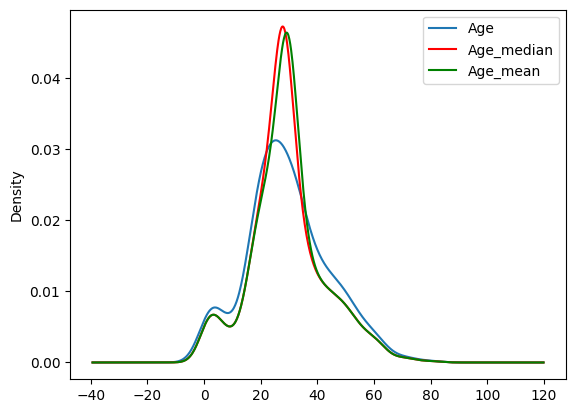

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
#changed as more value in mean range


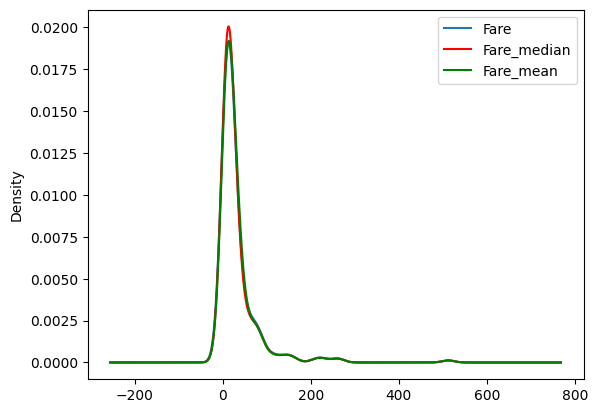

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#nothing to be afraid of

In [ ]:
x_train.cov()

,Age,Fare,Family,Age_median,Fare_median,Age_mean,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,70.082085,210.251707,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,2761.031435,60.224654,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,17.672035,-5.616299,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,59.728510,168.851934,60.700688
Fare_median,70.082085,2761.031435,17.672035,59.728510,2637.012482,56.282518,2621.232375
Age_mean,210.251707,60.224654,-5.616299,168.851934,56.282518,168.851934,57.175304
Fare_mean,71.193767,2761.031435,17.657433,60.700688,2621.232375,57.175304,2621.232375


In [ ]:
#relation with age and fare changed so drastic changes are not good

In [ ]:
x_train.corr()

,Age,Fare,Family,Age_median,Fare_median,Age_mean,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,0.087232,1.000000,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,1.000000,0.088151,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,0.204536,-0.256883,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.089416,0.998949,0.091145
Fare_median,0.087232,1.000000,0.204536,0.089416,1.000000,0.084346,0.997003
Age_mean,1.000000,0.088151,-0.256883,0.998949,0.084346,1.000000,0.085941
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.997003,0.085941,1.000000


<Axes: >

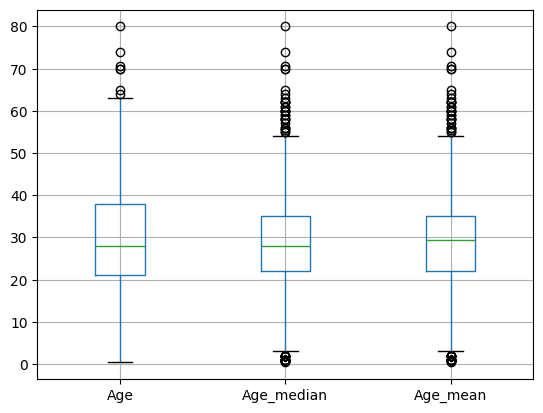

In [ ]:
x_train[['Age','Age_median','Age_mean']].boxplot()

#age median show outlier so red flag

<Axes: >

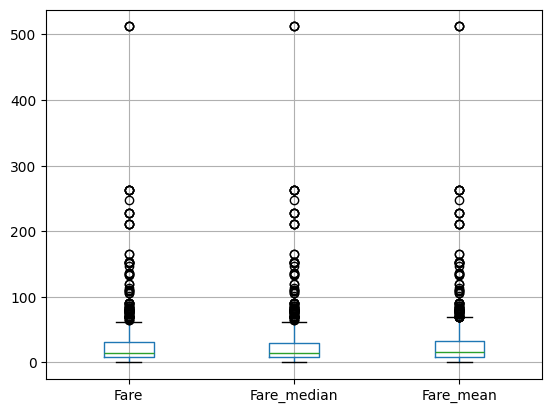

In [ ]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

In [ ]:
#sklearn
#missing_values: int float, str, np.nan, default = np.nan
#strategy: string - Mean, median, most_frequent, constant
#fill_value : string, numerical, Def = None

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy = 'mean')

In [ ]:
trf = ColumnTransformer([
    ('first', imputer1, ['Age']),
    ('second', imputer2, ['Fare'])
])

In [ ]:
trf.fit(x_train)

ColumnTransformer(transformers=[('first', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('second', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['first'].statistics_

array([28.])

In [ ]:
trf.named_transformers_['second'].statistics_

array([32.51778772])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [ ]:
x_train

array([[ 45.5       ,  28.5       ],
       [ 23.        ,  13.        ],
       [ 32.        ,   7.925     ],
       ...,
       [ 41.        ,  32.51778772],
       [ 14.        , 120.        ],
       [ 21.        ,  77.2875    ]])

<h1> Arbitrary </h1>

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [ ]:

print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after 99 wala imputation: ', x_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', x_train['Age_minus1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', x_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', x_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare Variance after 999 wala imputation:  47525.47059536007
Fare Variance after -1 wala imputation:  2675.2394049177087


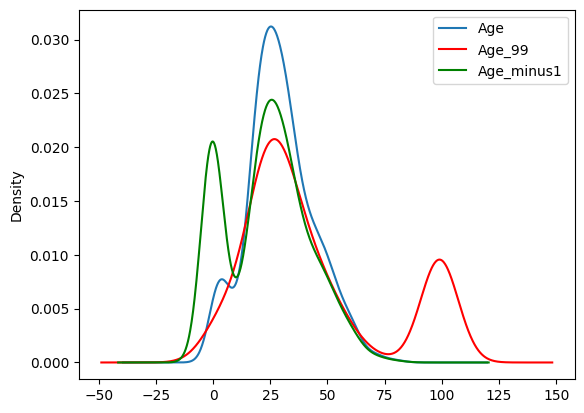

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

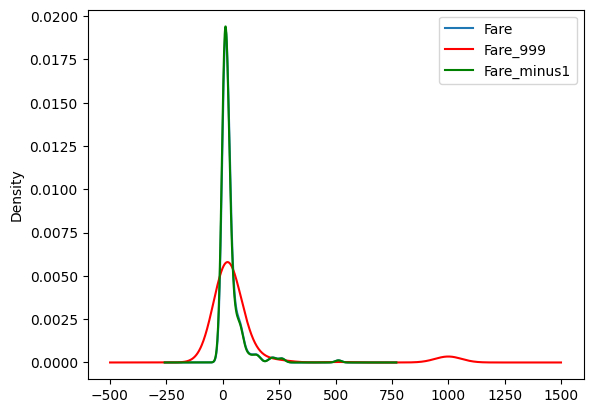

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [ ]:
imputer11 = SimpleImputer(strategy='constant', fill_value=99)
imputer22 = SimpleImputer(strategy = 'constant', fill_value=-1)

In [ ]:
trf = ColumnTransformer([
    ('first', imputer11, ['Age']),
    ('second', imputer22, ['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('first',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('second',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
#we do this we think data is not missing at random